In [451]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import math
from importlib import reload
%config IPCompleter.greedy=True
%config Completer.use_jedi = False
reload(plt)

<module 'matplotlib.pyplot' from '/home/joshua/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

In [690]:
Air = numpy.loadtxt('Clement_Desormes_Air.csv', delimiter=',', skiprows=2)
Ar = numpy.loadtxt('Clement_Desormes_Ar.csv', delimiter=',', skiprows=2)
CO2 = numpy.loadtxt('Clement_Desormes_CO2.csv', delimiter=',', skiprows=2)
N = numpy.loadtxt('Clement_Desormes_N.csv', delimiter=',', skiprows=2)
H = 101.5

In [666]:
Air

array([[ 104.23,   66.8 ,  115.71,  100.43,   15.28,  115.71],
       [ 103.78,  474.  ,  114.71,  100.44,   14.27,  114.71],
       [ 103.62,  925.6 ,  113.08,  100.45,   12.63,  113.08],
       [ 104.18, 1667.4 ,  115.36,  100.47,   14.9 ,  115.36],
       [ 103.5 , 2121.4 ,  112.23,  100.47,   11.75,  112.23],
       [ 103.38, 2607.  ,  111.89,  100.5 ,   11.39,  111.89],
       [ 103.34, 3703.2 ,  112.15,  100.52,   11.63,  112.15],
       [ 103.34, 4462.9 ,  110.98,  100.52,   10.45,  110.98],
       [ 102.78, 4808.9 ,  109.1 ,  100.53,    8.58,  109.1 ],
       [ 102.27, 5336.2 ,  106.85,  100.54,    6.31,  106.85],
       [ 102.38, 6015.4 ,  107.22,  100.56,    6.66,  107.22]])

Column 0: P1 (kPa)
Column 1: Time (s)
Column 2: P0 (kPa)
Column 3: H (kPa)

In [42]:
def gamma(P0, P1, H):
    num = np.log(P0 / H)
    den = np.log(P0 / P1)
    
    return num / den

In [181]:
gamma_air = np.array([])
for i in Air:
     gamma_air = np.append(gamma_air, gamma(i[2], i[0], 101.5))

print(gamma_air.mean())
gamma_air.std()

1.2256348985992027


0.02595560493376384

In [127]:
gamma_ar = np.array([])
for i in Ar:
     gamma_ar = np.append(gamma_ar, gamma(i[2], i[0], 101.5))

print(gamma_ar.mean())
gamma_ar.std()

1.3972558250888327


0.05282695114331369

In [128]:
gamma_co2 = np.array([])
for i in CO2:
     gamma_co2 = np.append(gamma_co2, gamma(i[2], i[0], 101.5))

print(gamma_co2.mean())
gamma_co2.std()

1.191879841507812


0.0203548392488171

In [143]:
gamma_n = np.array([])
for i in N:
     gamma_n = np.append(gamma_n, gamma(i[2], i[0], 101.5))

print(gamma_n.mean())
gamma_n.std() #/ np.sqrt(gamma_n.size)

1.2337043643376577


0.03422291374419682

Functions:

In [354]:
def plot_data(P0, P1, H):
    num = np.log(P0 / H)
    den = np.log(P0 / P1)
    
    return (num, den)

In [415]:
def least_error(x,y,m,c, N): 
    cu_squared = sum((y - m*x - c)**2) * (1/(N-2))
    den = N*sum(x**2)-sum(x)**2
    msigma = (N/den) * cu_squared
    csigma = (sum(x**2)/den)*cu_squared
    return np.sqrt((msigma)), np.sqrt((csigma))

<h2>Analysis 1/2: </h2>

<h3>Air

In [684]:
air_data_x = numpy.array([])
air_data_y = numpy.array([])
air_error_y = numpy.array([])
air_error_x = numpy.array([])
index = 0
for i in Air:
    air_data_y = np.append(air_data_y, plot_data(i[2],i[0], H)[0])
    air_data_x = np.append(air_data_x, plot_data(i[2],i[0], H)[1])
    air_error_y = np.append(air_error_y, air_data_y[index] * np.sqrt((0.01 / i[2])**2 + (0.2 / H)))
    air_error_x = np.append(air_error_x, air_data_x[index] * np.sqrt((0.01 / i[2])**2 + (0.2 / i[0])))
    index += 1

a_num = 0; a_den = 0
for i in air_data_x:
    for j in air_data_y:
        a_num += i*j
        a_den += i**2

a_air = a_num / a_den

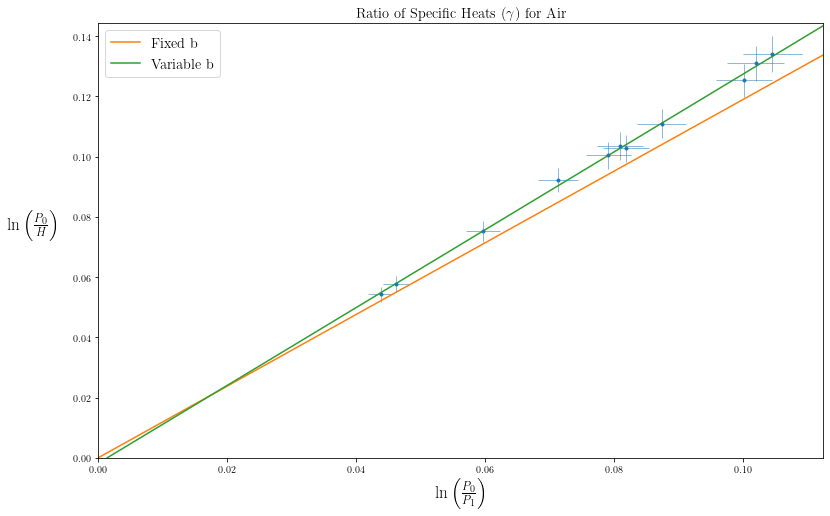

In [685]:
figure(figsize=(13,8))
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.errorbar(air_data_x, air_data_y, fmt='.', xerr= air_error_x, yerr=air_error_y, elinewidth=0.5)
plt.ylim(0, )
plt.xlim(0,)
x = np.linspace(start= 0, stop = 0.2)
plt.plot(x, a_air*x, label='Fixed b')

m_air,c_air = np.polyfit(air_data_x, air_data_y, 1)
plt.plot(x, m_air*x+ c_air, label='Variable b')
plt.legend(loc='best', fontsize='x-large')
plt.title(r'Ratio of Specific Heats ($\gamma$) for Air', fontsize='x-large')
plt.xlabel(xlabel=r"$\ln \left( \frac{{P_0}}{{P_1}} \right)$", fontsize='xx-large')
plt.ylabel(ylabel=r"$\ln \left( \frac{{P_0}}{{H}} \right)$", fontsize='xx-large', rotation=0, labelpad=40)

plt.show()

In [686]:
un_air = least_error(air_data_x, air_data_y, m_air, c_air, Air.shape[0])
print("Gamma is", m_air, "\u00B1", un_air[0])
print("Gamma may be", a_air)

Gamma is 1.2924163935195743 ± 0.017673613611199023
Gamma may be 1.18997100026701


<h3> Argon

In [687]:
ar_data_x = numpy.array([])
ar_data_y = numpy.array([])
ar_error_y = numpy.array([])
ar_error_x = numpy.array([])
index = 0
for i in Ar:
    ar_data_y = np.append(ar_data_y, plot_data(i[2],i[0], H)[0])
    ar_data_x = np.append(ar_data_x, plot_data(i[2],i[0], H)[1])
    ar_error_y = np.append(ar_error_y, ar_data_y[index] * np.sqrt((0.01 / i[2])**2 + (0.2 / H)))
    ar_error_x = np.append(ar_error_x, ar_data_x[index] * np.sqrt((0.01 / i[2])**2 + (0.2 / i[0])))
    index += 1

a_num = 0; a_den = 0
for i in ar_data_x:
    for j in ar_data_y:
        a_num += i*j
        a_den += i**2

a_ar = a_num / a_den

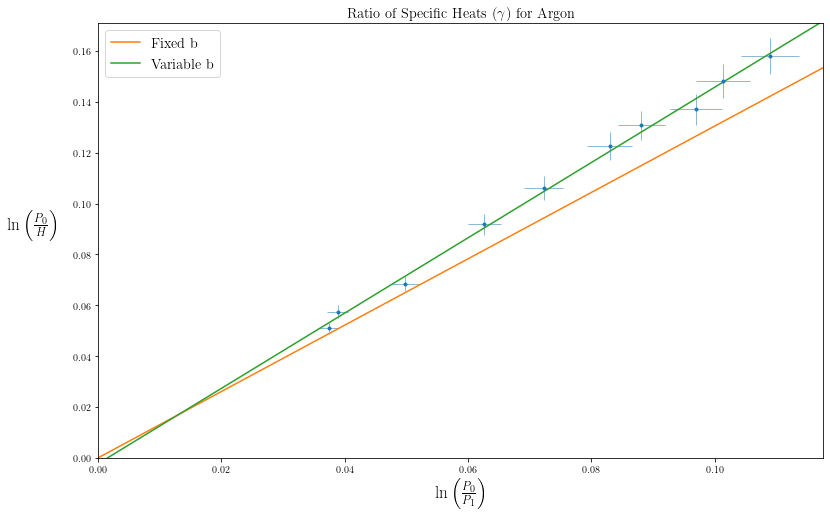

In [688]:
figure(figsize=(13,8))
plt.errorbar(ar_data_x, ar_data_y, fmt='.', xerr= ar_error_x, yerr=ar_error_y, elinewidth=0.5)
plt.ylim(0, )
plt.xlim(0,)
x = np.linspace(start= 0, stop = 0.2)
plt.plot(x, a_ar*x, label='Fixed b')


m_ar,c_ar = np.polyfit(ar_data_x, ar_data_y, 1)
plt.plot(x, m_ar*x+ c_ar, label ='Variable b')
plt.legend(loc='best', fontsize='x-large')

plt.title(r'Ratio of Specific Heats ($\gamma$) for Argon', fontsize='x-large')
plt.xlabel(xlabel=r"$\ln \left( \frac{{P_0}}{{P_1}} \right)$", fontsize='xx-large')
plt.ylabel(ylabel=r"$\ln \left( \frac{{P_0}}{{H}} \right)$", fontsize='xx-large', rotation=0, labelpad=40)


plt.show()

In [689]:
un_ar = least_error(ar_data_x, ar_data_y, m_ar, c_ar, Ar.shape[0])
print("Gamma is", m_ar, "\u00B1", un_ar[0])
print("Gamma may be", a_ar)

Gamma is 1.4797517854661555 ± 0.032385849569369615
Gamma may be 1.3041739035305746


<h3> Nitrogen

In [673]:
N_data_x = numpy.array([])
N_data_y = numpy.array([])
N_error_y = numpy.array([])
N_error_x = numpy.array([])
index = 0
for i in N:
    N_data_y = np.append(N_data_y, plot_data(i[2],i[0], H)[0])
    N_data_x = np.append(N_data_x, plot_data(i[2],i[0], H)[1])
    N_error_y = np.append(N_error_y, N_data_y[index] * np.sqrt((0.01 / i[2])**2 + (0.2 / H)))
    N_error_x = np.append(N_error_x, N_data_x[index] * np.sqrt((0.01 / i[2])**2 + (0.2 / i[0])))
    index += 1

a_num = 0; a_den = 0
for i in N_data_x:
    for j in N_data_y:
        a_num += i*j
        a_den += i**2

a_N = a_num / a_den

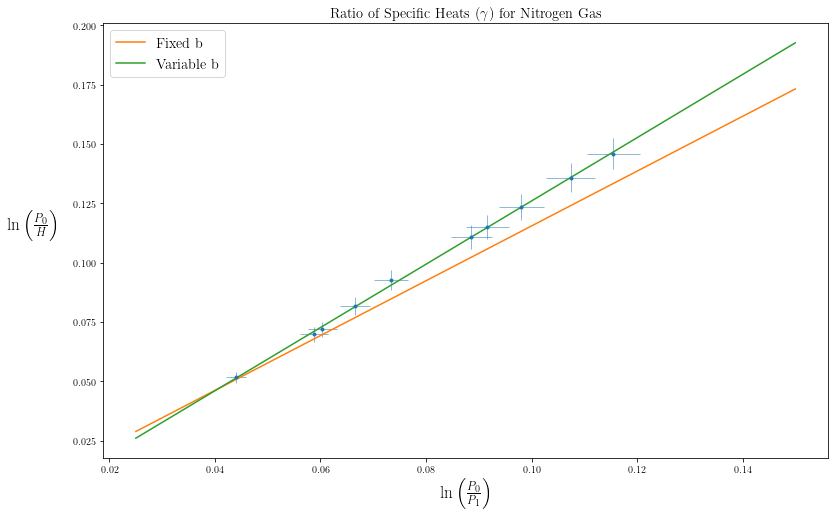

In [674]:
figure(figsize=(13,8))
plt.errorbar(N_data_x, N_data_y, fmt='.', xerr= N_error_x, yerr=N_error_y, elinewidth=0.5)
#plt.ylim(0, )
#plt.xlim(0,)
x = np.linspace(start= 0.025, stop = 0.15)
plt.plot(x, a_N*x, label='Fixed b')


m_N,c_N = np.polyfit(N_data_x, N_data_y, 1)
plt.plot(x, m_N*x+ c_N, label ='Variable b')
plt.legend(loc='best', fontsize='x-large')

plt.title(r'Ratio of Specific Heats ($\gamma$) for Nitrogen Gas', fontsize='x-large')
plt.xlabel(xlabel=r"$\ln \left( \frac{{P_0}}{{P_1}} \right)$", fontsize='xx-large')
plt.ylabel(ylabel=r"$\ln \left( \frac{{P_0}}{{H}} \right)$", fontsize='xx-large', rotation=0, labelpad=40)


plt.show()

In [675]:
un_N = least_error(N_data_x, N_data_y, m_N, c_N, N.shape[0])
print("Gamma is", m_N, "\u00B1", un_N[0])
print("Gamma may be", a_N)

Gamma is 1.3325330721977882 ± 0.014989797224081404
Gamma may be 1.1544199061704778


<h3> CO2

In [676]:
CO2_data_x = numpy.array([])
CO2_data_y = numpy.array([])
CO2_error_y = numpy.array([])
CO2_error_x = numpy.array([])
index = 0
for i in CO2:
    CO2_data_y = np.append(CO2_data_y, plot_data(i[2],i[0], H)[0])
    CO2_data_x = np.append(CO2_data_x, plot_data(i[2],i[0], H)[1])
    CO2_error_y = np.append(CO2_error_y, CO2_data_y[index] * np.sqrt((0.01 / i[2])**2 + (0.2 / H)))
    CO2_error_x = np.append(CO2_error_x, CO2_data_x[index] * np.sqrt((0.01 / i[2])**2 + (0.2 / i[0])))
    index += 1

a_num = 0; a_den = 0
for i in CO2_data_x:
    for j in CO2_data_y:
        a_num += i*j
        a_den += i**2

a_CO2 = a_num / a_den

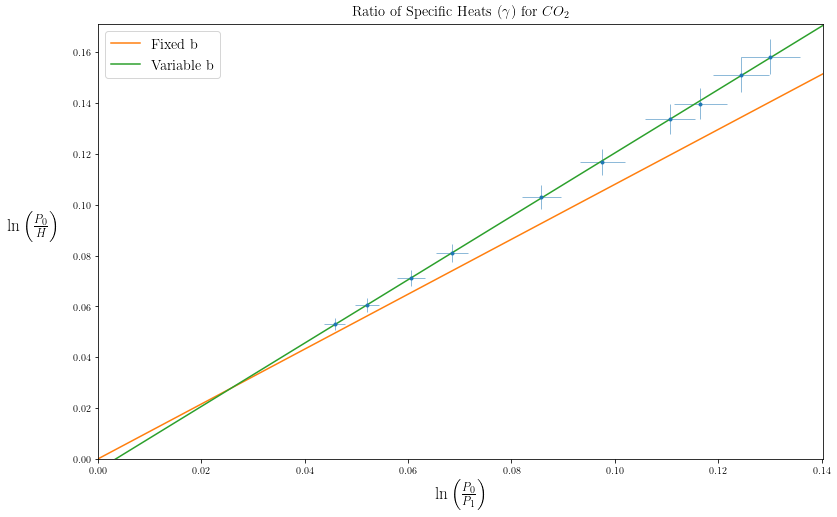

In [677]:
figure(figsize=(13,8))
plt.errorbar(CO2_data_x, CO2_data_y, fmt='.', xerr= CO2_error_x, yerr=CO2_error_y, elinewidth=0.5)
plt.ylim(0, )
plt.xlim(0,)
x = np.linspace(start= 0, stop = 0.2)
plt.plot(x, a_CO2*x, label='Fixed b')


m_CO2,c_CO2 = np.polyfit(CO2_data_x, CO2_data_y, 1)
plt.plot(x, m_CO2*x+ c_CO2, label ='Variable b')
plt.legend(loc='best', fontsize='x-large')

plt.title(r'Ratio of Specific Heats ($\gamma$) for $CO_2$', fontsize='x-large')
plt.xlabel(xlabel=r"$\ln \left( \frac{{P_0}}{{P_1}} \right)$", fontsize='xx-large')
plt.ylabel(ylabel=r"$\ln \left( \frac{{P_0}}{{H}} \right)$", fontsize='xx-large', rotation=0, labelpad=40)


plt.show()

In [678]:
un_CO2 = least_error(CO2_data_x, CO2_data_y, m_CO2, c_CO2, CO2.shape[0])
print("Gamma is", m_CO2, "\u00B1", un_CO2[0])
print("Gamma may be", a_CO2)

Gamma is 1.2464364936794226 ± 0.005854295418252326
Gamma may be 1.0800741160652


<h2> Analysis 3: Class Data

In [553]:
Class = np.loadtxt('Specific_Heat_class_data_Tue.csv', delimiter=',', skiprows=2, usecols=1)

In [554]:
Class

array([1.33  , 1.33  , 1.31  , 1.39  , 1.6   , 1.35  , 1.28  , 1.43  ,
       1.2   , 1.071 , 1.093 , 1.18  , 3.    , 1.2   , 1.2   , 1.31  ,
       1.4   , 1.05  , 1.23  , 1.355 , 1.5345, 1.3333, 1.2582, 1.3557,
       1.7579, 1.5107, 1.605 , 2.199 , 1.593 , 1.034 , 1.287 , 1.061 ,
       1.0525, 1.3462, 1.2446, 1.3389, 1.4662, 1.326 , 1.232 , 1.3062,
       1.5376, 1.3309, 1.2858, 1.2899, 1.4289, 0.9615, 1.284 , 1.3076,
       1.4295, 0.9678, 1.2807, 1.425 ])

In [559]:
i = 0
Class_Air = np.array([])
Class_Ar = np.array([])
Class_N = np.array([])
Class_CO2 = np.array([])

while (i < Class.size / 4):
    Class_Ar = np.append(Class_Ar, Class[i * 4])
    Class_N = np.append(Class_N, Class[(i * 4) + 1])
    Class_CO2 = np.append(Class_CO2, Class[(i * 4) + 2])
    Class_Air = np.append(Class_Air, Class[(i * 4) + 3])

    i += 1

In [579]:
print("Argon\n\nMean: ", Class_Ar.mean(), "\nStandard Deviation:", Class_Ar.std(), "\n")
print("Nitrogen\n\nMean: ", Class_N.mean(), "\nStandard Deviation:", Class_N.std(), "\n")
print("Carbon Dioxide\n\nMean: ", Class_CO2.mean(), "\nStandard Deviation:", Class_CO2.std(), "\n")
print("Air\n\nMean: ", Class_Air.mean(), "\nStandard Deviation:", Class_Air.std())

Argon

Mean:  1.5638538461538463 
Standard Deviation: 0.4493657489521881 

Nitrogen

Mean:  1.2162615384615387 
Standard Deviation: 0.17145239993592093 

Carbon Dioxide

Mean:  1.2761769230769233 
Standard Deviation: 0.10895853942490909 

Air

Mean:  1.3806384615384615 
Standard Deviation: 0.254762726830768


In [586]:
def per_diff(m1,m2):
    num = m1 - m2
    den = (m1 + m2) / 2
    
    return num/den

def per_error(measure, theo):
    num = abs(theo - measure)
    den = abs(theo)
    
    return num/den

In [582]:
per_diff(m_ar, Class_Ar.mean())

-0.0552647556003672

In [583]:
per_diff(m_N, Class_N.mean())

0.09123648743605285

In [584]:
per_diff(m_CO2, Class_CO2.mean())

-0.023579062253416484

In [585]:
per_diff(m_air, Class_Air.mean())

-0.06600842317317226

In [587]:
per_error(m_ar, 5/3.)

0.11214892872030648

In [588]:
per_error(m_N, 7/5.)

0.04819066271586554

In [589]:
per_error(m_CO2, 4/3.)

0.06517262974043303

In [691]:
per_error(m_air, 7/5.)

0.07684543320030403

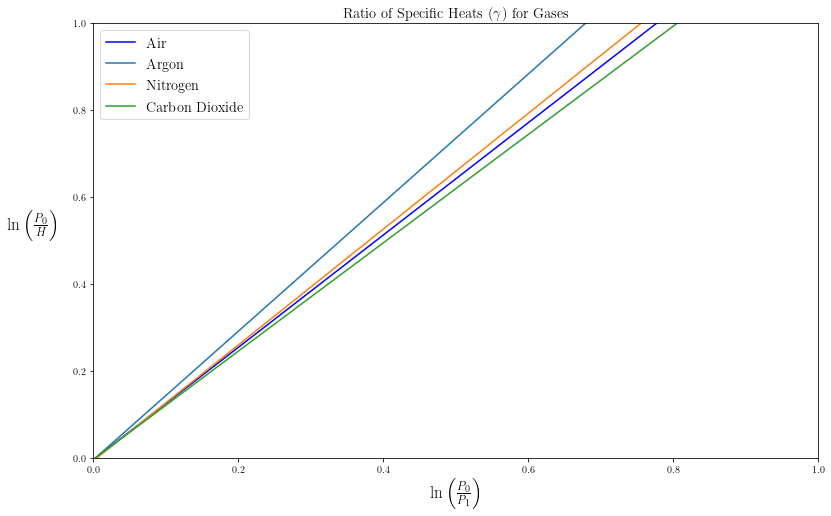

In [637]:
figure(figsize=(13,8))
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
#plt.errorbar(air_data_x, air_data_y, fmt='.', xerr= air_error_x, yerr=air_error_y, elinewidth=0.5)
plt.ylim(0,1)
plt.xlim(0,)
x = np.linspace(start= 0, stop = 2)
#plt.plot(x, a_air*x, label='Fixed b')


plt.plot(x, m_air*x+ c_air, '-b', label='Air')
plt.plot(x, m_ar*x+ c_ar, label='Argon')
plt.plot(x, m_N*x+ c_N, label='Nitrogen')
plt.plot(x, m_CO2*x+ c_CO2, label='Carbon Dioxide')
plt.legend(loc='best', fontsize='x-large')
plt.title(r'Ratio of Specific Heats ($\gamma$) for Gases', fontsize='x-large')
plt.xlabel(xlabel=r"$\ln \left( \frac{{P_0}}{{P_1}} \right)$", fontsize='xx-large')
plt.ylabel(ylabel=r"$\ln \left( \frac{{P_0}}{{H}} \right)$", fontsize='xx-large', rotation=0, labelpad=40)

plt.show()

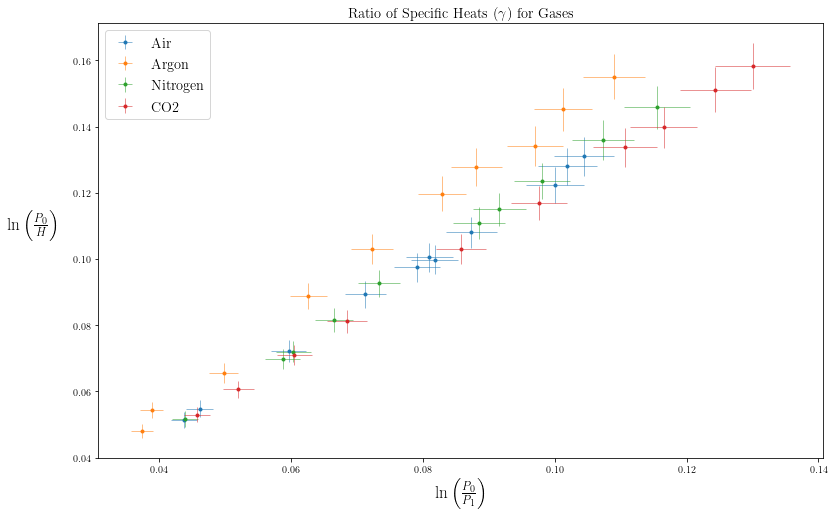

In [647]:
figure(figsize=(13,8))
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.errorbar(air_data_x, air_data_y, fmt='.', xerr= air_error_x, yerr=air_error_y, elinewidth=0.5, label='Air')
plt.errorbar(ar_data_x, ar_data_y, fmt='.', xerr= ar_error_x, yerr=ar_error_y, elinewidth=0.5, label='Argon')
plt.errorbar(N_data_x, N_data_y, fmt='.', xerr= N_error_x, yerr=N_error_y, elinewidth=0.5, label='Nitrogen')
plt.errorbar(CO2_data_x, CO2_data_y, fmt='.', xerr= CO2_error_x, yerr=CO2_error_y, elinewidth=0.5, label='CO2')
#plt.ylim(0,)
#plt.xlim(0,)
x = np.linspace(start= 0, stop = 0.2)
#plt.plot(x, a_air*x, label='Fixed b')


#plt.plot(x, m_air*x+ c_air, '-b', label='Air')
#plt.plot(x, m_ar*x+ c_ar, label='Argon')
#plt.plot(x, m_N*x+ c_N, label='Nitrogen')
#plt.plot(x, m_CO2*x+ c_CO2, label='Carbon Dioxide')
plt.legend(loc='best', fontsize='x-large')
plt.title(r'Ratio of Specific Heats ($\gamma$) for Gases', fontsize='x-large')
plt.xlabel(xlabel=r"$\ln \left( \frac{{P_0}}{{P_1}} \right)$", fontsize='xx-large')
plt.ylabel(ylabel=r"$\ln \left( \frac{{P_0}}{{H}} \right)$", fontsize='xx-large', rotation=0, labelpad=40)

plt.show()

In [655]:
plot_data(Air[0][2],Air[0][0],101.5)

(0.131028262406404, 0.10448706513701518)

0.029509856064426663